In [1]:
%run ../draw_functions.py
%run ../kstest.py

In [2]:
from draw_functions import *
from kstest import *

In [3]:
#read csv
df = pd.read_csv('../csv/MX1240131140201.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,423CFBDA-103F-4870-928F-040AFEF20516,0.018333,1.412313,144204B,OU1AVFMH,NaN
1,423CFBDA-103F-4870-928F-040AFEF20516,0.028333,1.378417,144204B,OU1AVFMH,-3.389550
2,423CFBDA-103F-4870-928F-040AFEF20516,0.038333,1.355820,144204B,OU1AVFMH,-2.259700
3,423CFBDA-103F-4870-928F-040AFEF20516,0.047933,1.366667,144204B,OU1AVFMH,1.129850
4,423CFBDA-103F-4870-928F-040AFEF20516,0.048333,1.367119,144204B,OU1AVFMH,1.129850
...,...,...,...,...,...,...
3519,9AF7E7CD-2B3C-471F-B411-7EE763F31E24,0.816667,8.270502,142502B,OU1ASWJE,4.519400
3520,9AF7E7CD-2B3C-471F-B411-7EE763F31E24,0.861600,8.434105,142502B,OU1ASWJE,3.641000
3521,9AF7E7CD-2B3C-471F-B411-7EE763F31E24,0.866667,8.451278,142502B,OU1ASWJE,3.389550
3522,9AF7E7CD-2B3C-471F-B411-7EE763F31E24,0.909467,8.559292,142502B,OU1ASWJE,2.523684


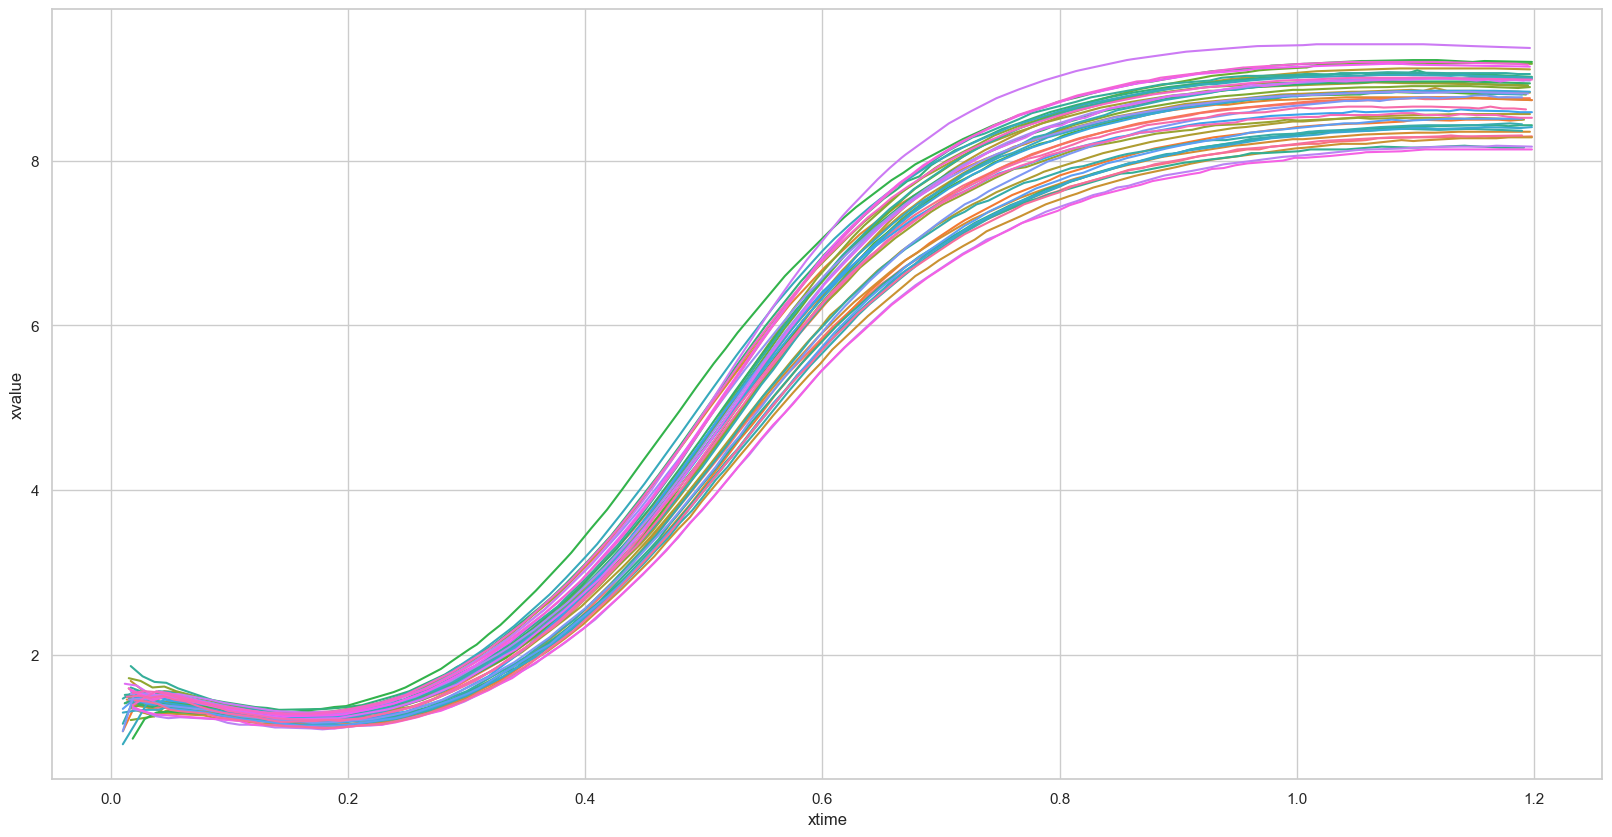

In [4]:
dessiner_commande(df)

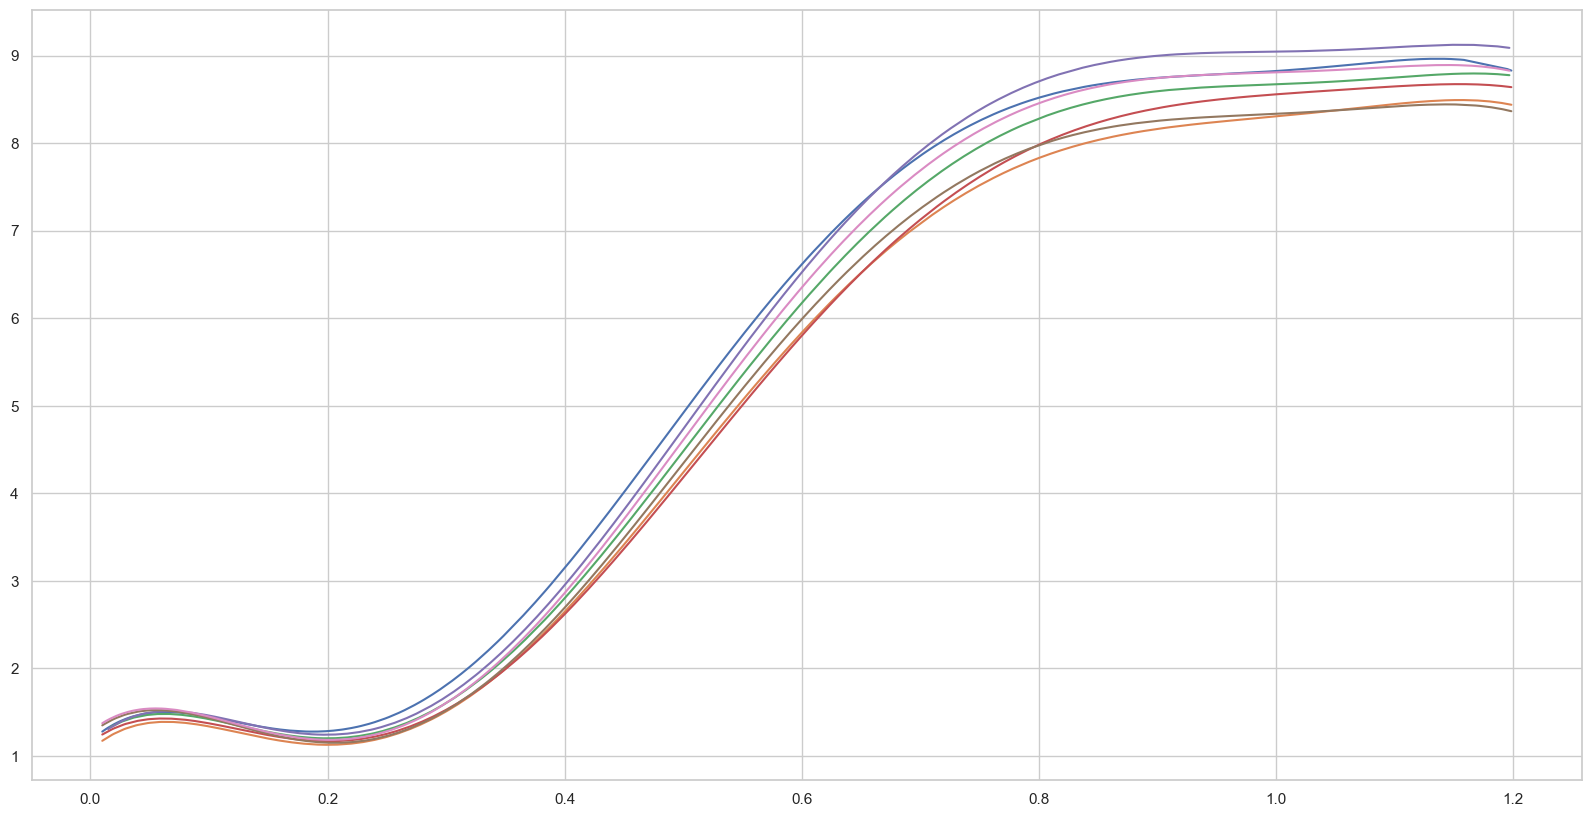

In [5]:
dessiner_commande(df,degree=6)

## Analyse des pentes

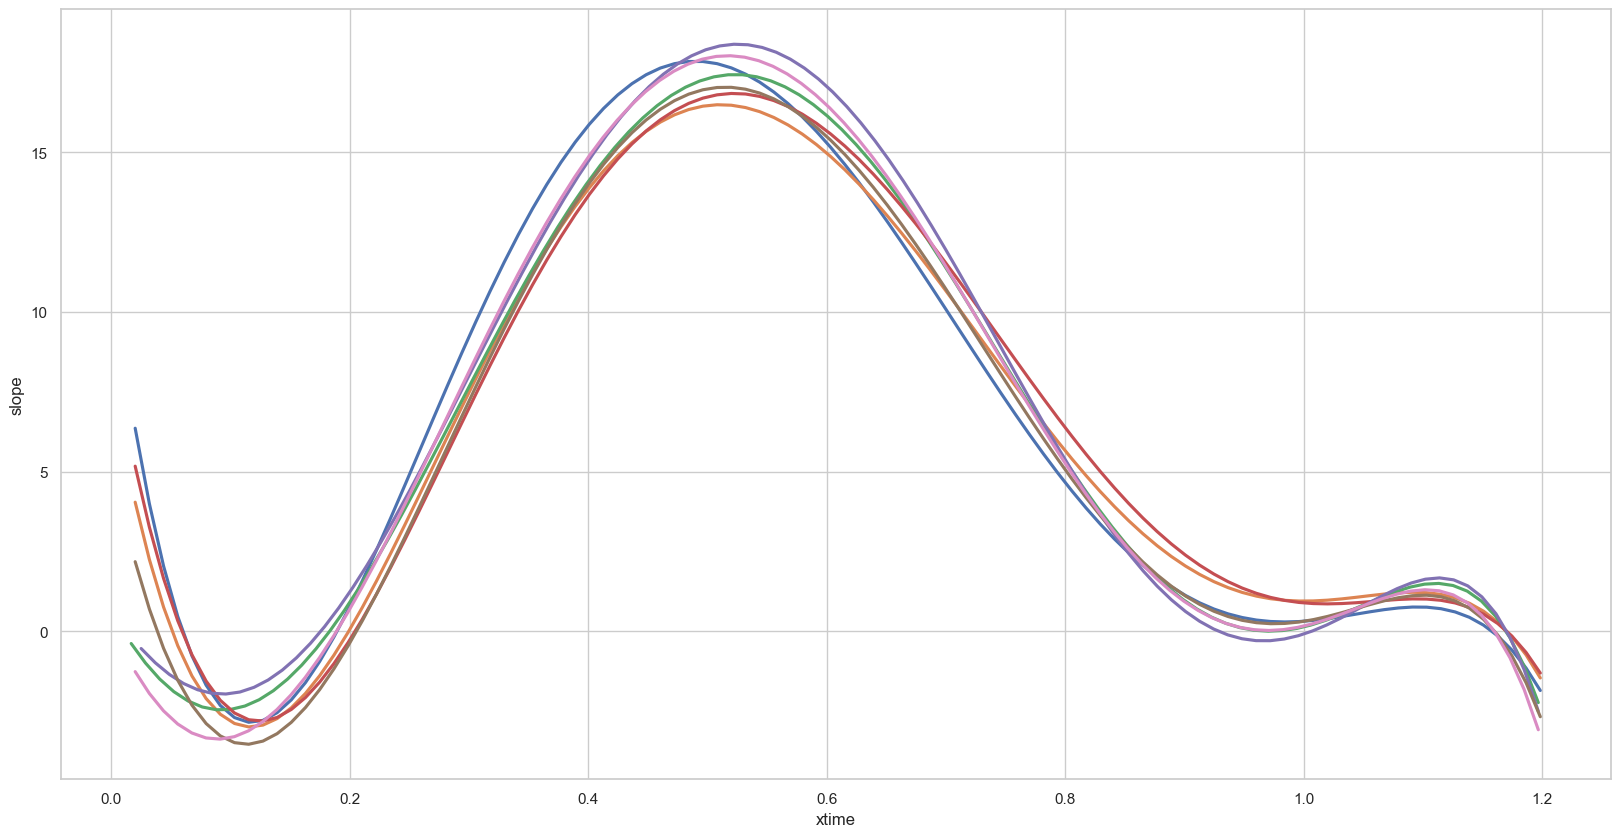

In [6]:
dessiner_commande_slope(df, 6 ,unified=True)

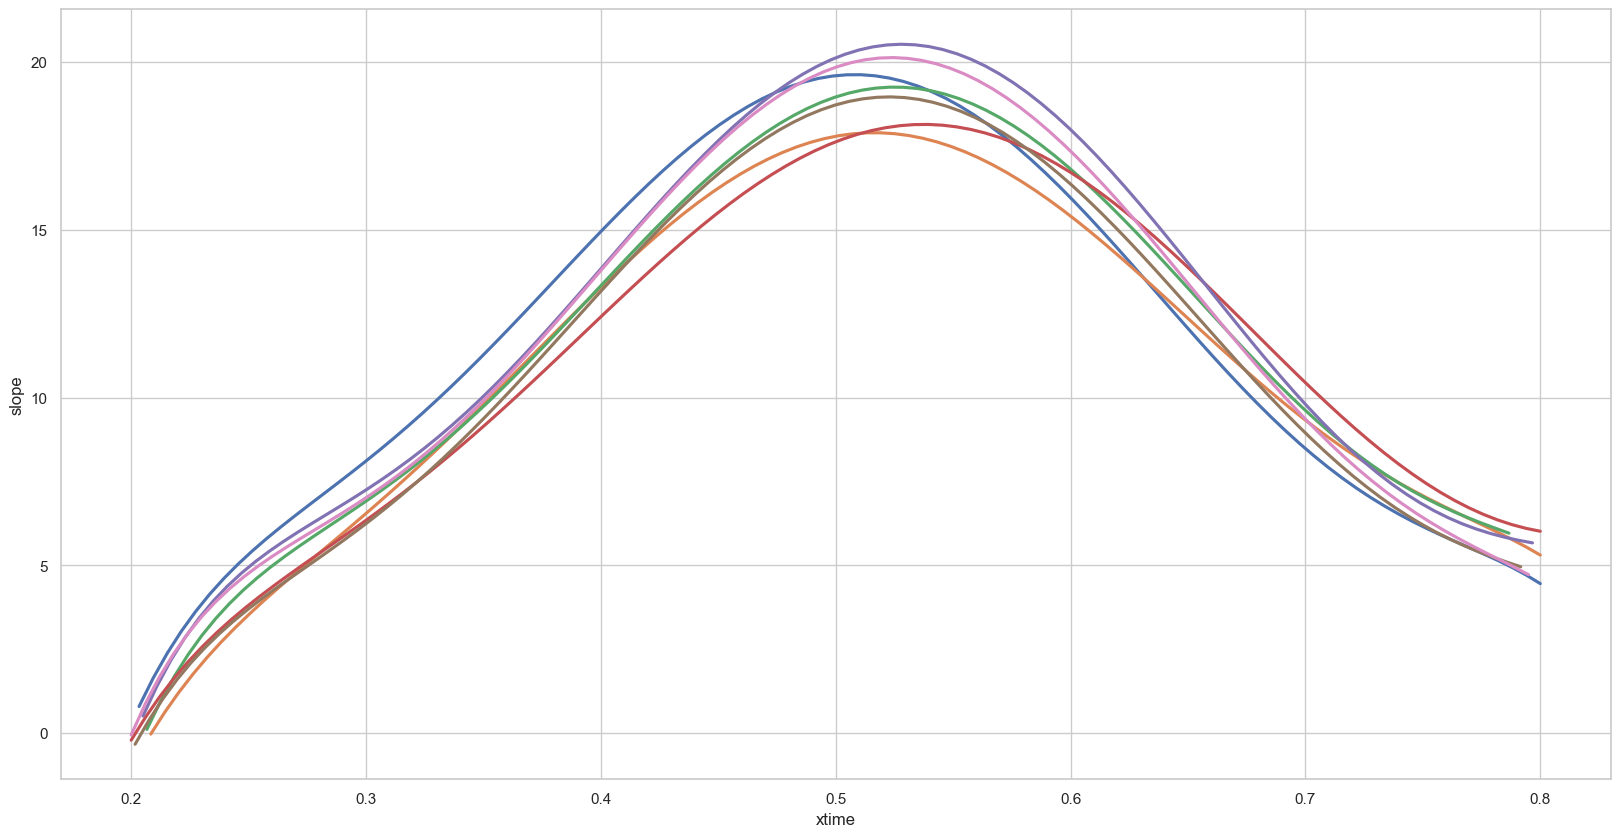

In [7]:
dessiner_commande_slope(df_02_08, 6 ,unified=True)

- Batch 150306B: 5.740152346331837
- Batch 151107B: 5.015090855658385
- Batch 144204B: 4.7195200675313425
- Batch 141401B: 4.623730535455862
- Batch 145405B: 4.568540529670707
- Batch 142502B: 3.6836037497599188
- Batch 143003B: 3.576730124906754


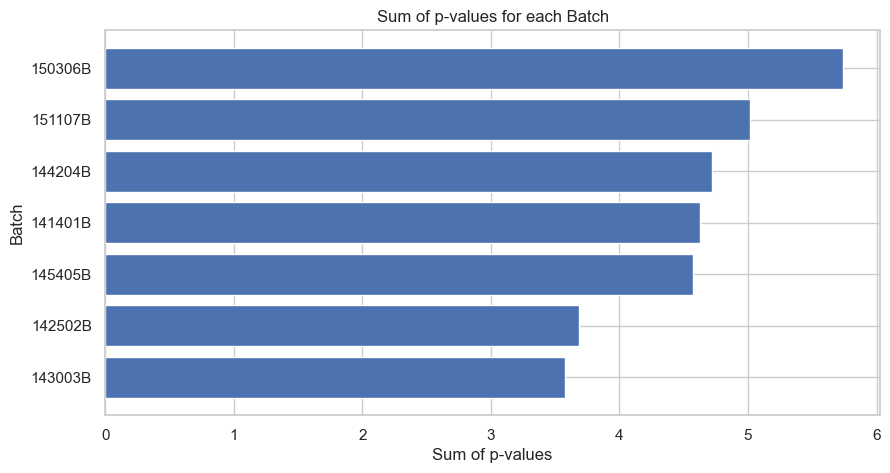

In [8]:
batch_pvalues = ks_test_slope(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

- Batch 150306B: 18.277882620676813
- Batch 145405B: 9.820069205187005
- Batch 142502B: 9.771297013691838
- Batch 141401B: 4.997988807858157
- Batch 143003B: 4.99798785121374
- Batch 151107B: 4.002208083437261
- Batch 144204B: 4.002078275799561


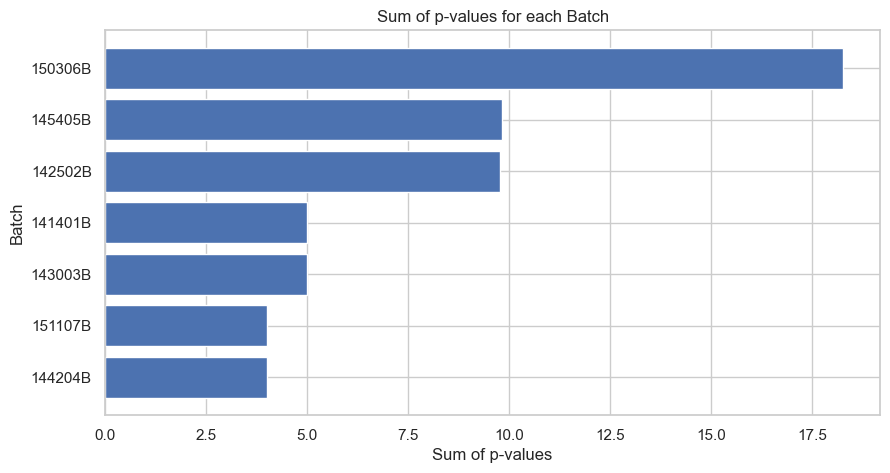

In [9]:
batch_pvalues = ks_test_value(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

In [11]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_xtime = df_02_08.loc[df_02_08.groupby('Batch')['slope'].idxmax()]['xtime']

# Calculer la différence entre le max et le min des xtime
max_diff = max_slope_xtime.max() - max_slope_xtime.min()

print("La plus grande différence de temps entre les max des pentes des différentes batch est :", round(max_diff*60,3), "secondes")

La plus grande différence des xtime entre les max des pentes des différentes batch est : 6.0 secondes


In [5]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').median()

# Calculer la médiane de xtime pour chaque groupe
median_xtime = max_slope_sample_xtime.median()

# Calculer la différence entre le xtime du max de la pente et la médiane de xtime pour chaque groupe
diff = max_slope_batch_xtime - 0.5255642654166667

# Sort the differences by their absolute values in descending order
diff_sorted = diff.abs().sort_values(ascending=False)

# Print the differences in the sorted order
for batch in diff_sorted.index:
    print(
        f"La différence de temps entre le max de la pente et la médiane pour le batch {batch} est : {round(diff_sorted[batch] * 60, 3)} seconde")

La différence de temps entre le max de la pente et la médiane pour le batch 144204B est : 2.134 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 145405B est : 0.866 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 141401B est : 0.516 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 142502B est : 0.058 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 150306B est : 0.058 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 151107B est : 0.052 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 143003B est : 0.024 seconde


In [6]:
round(np.std(max_slope_batch_xtime) * 1000, 2)

14.82

In [7]:
round(np.std(max_slope_sample_xtime) * 1000, 2)

26.17

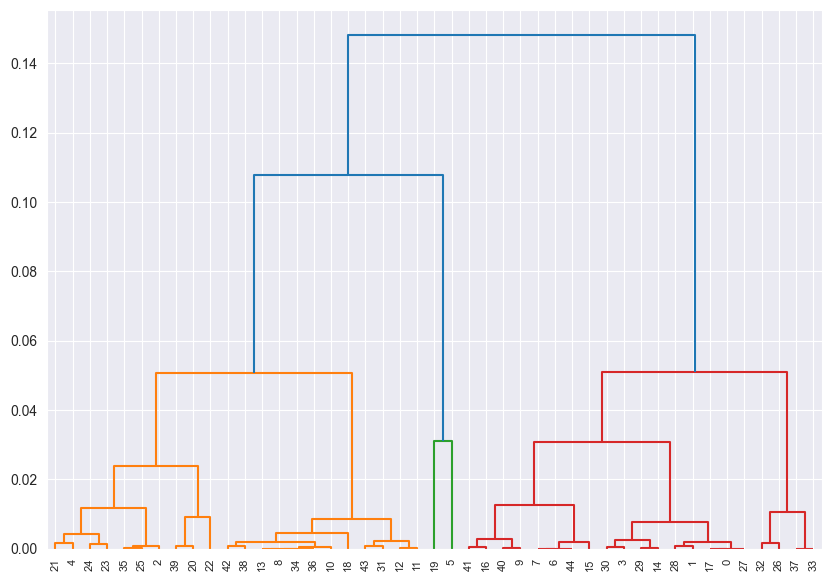

In [4]:
from utils import *

df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)].copy()

df_ = add_fitted_slope(df_02_08)
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster

max_slope_sample_xtime = \
df_02_08.loc[df_02_08.groupby('Sample_Code')['fitted_slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']

values = np.array(max_slope_sample_xtime).reshape(-1, 1)
# Générer les liens entre les clusters
linked = linkage(values, 'ward')
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Reshape your data to a 2D array
data = np.array(max_slope_sample_xtime).reshape(-1, 1)

# Generate the links between the clusters
linked = linkage(data, 'ward')

# Create a new plot
plt.figure(figsize=(10, 7))

# Draw the dendrogram
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

# Show the plot
plt.show()